Total amount of images: 555
Dataset contains 1110 image pairs
Train contains 888 image pairs
Validation contains 111 image pairs
Test contains 111 image pairs


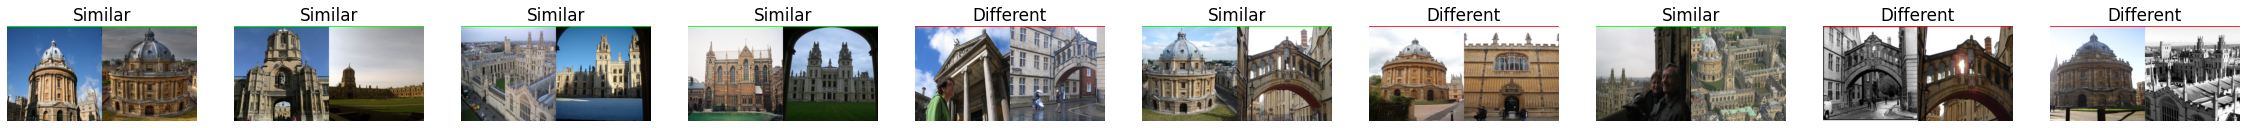

In [1]:
import sys
sys.path.append('../../utility')
import util
import numpy as np

folders = util.load_images('../../data/dataset_pairs')
data, labels = util.create_pairs(folders)
data, labels = util.shuffle_data(data, labels)
data_split, labels_split = util.split_data(data, labels)
data_train, data_val, data_test = data_split
labels_train, labels_val, labels_test = labels_split

print('Dataset contains', data.shape[0], 'image pairs')
print('Train contains', data_train.shape[0], 'image pairs')
print('Validation contains', data_val.shape[0], 'image pairs')
print('Test contains', data_test.shape[0], 'image pairs')

util.visualize(data_train, labels_train)

In [2]:
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.resnet import ResNet50

input_shape = (224, 224, 3)

# ResNet50 Feature Extraction
resnet_embedding = Sequential(name='resnet_embedding')
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
resnet.Trainable = False
resnet_embedding.add(resnet)
resnet_embedding.add(GlobalAveragePooling2D())

In [7]:
similarity = util.get_similarity_from_embedding(resnet_embedding, data)

Took 161.73 seconds to predict 1110 image pairs
Prediction time: 0.15 seconds


Best accuracy: 0.5369369369369369
resnet
- Amount of TP: 494
- Amount of TN: 102
- Amount of FP: 453
- Amount of FN: 61
- AUC score: 0.5995925655385115
- Accuracy: 0.5369369369369369
- Recall: 0.8900900900900901
- Precision: 0.5216473072861668
- F1: 0.6577896138482024
- Kappa: 0.0738738738738739


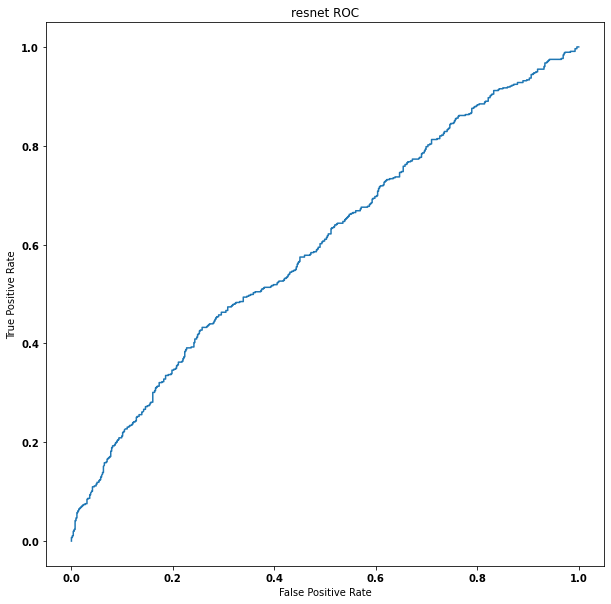

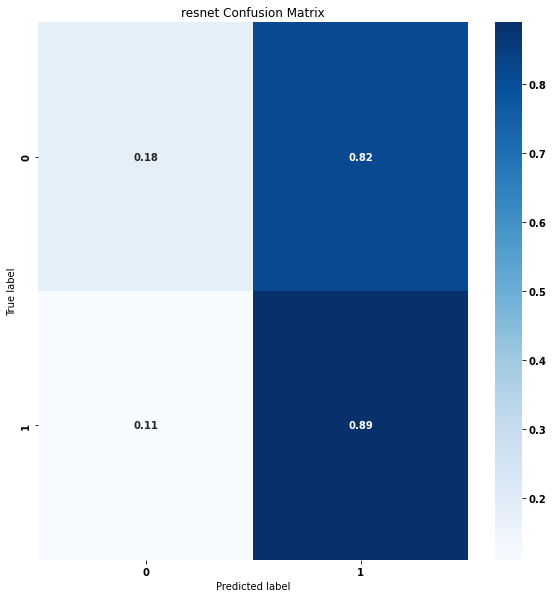

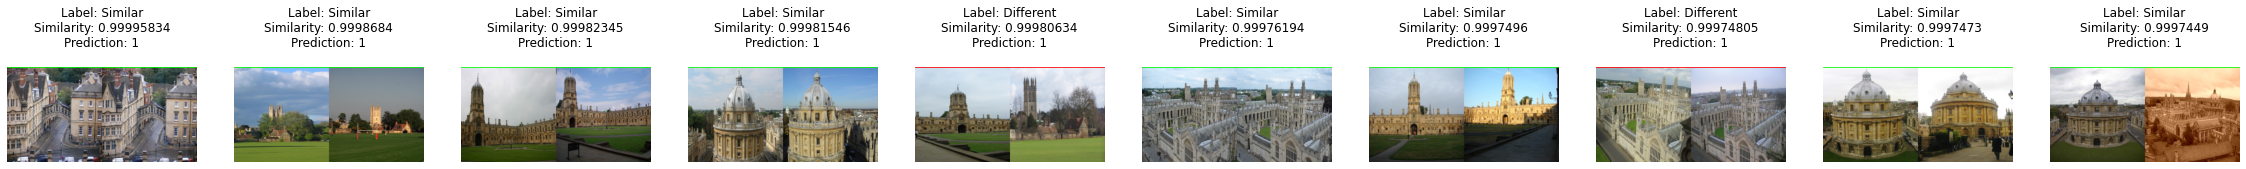

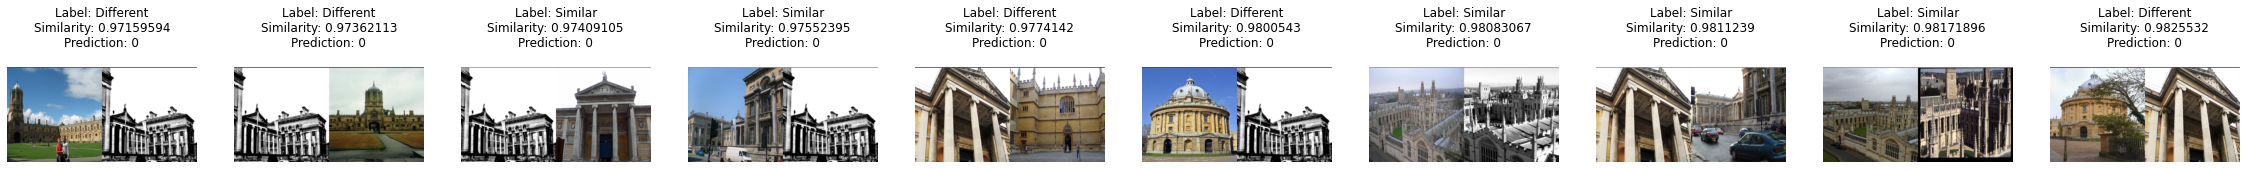

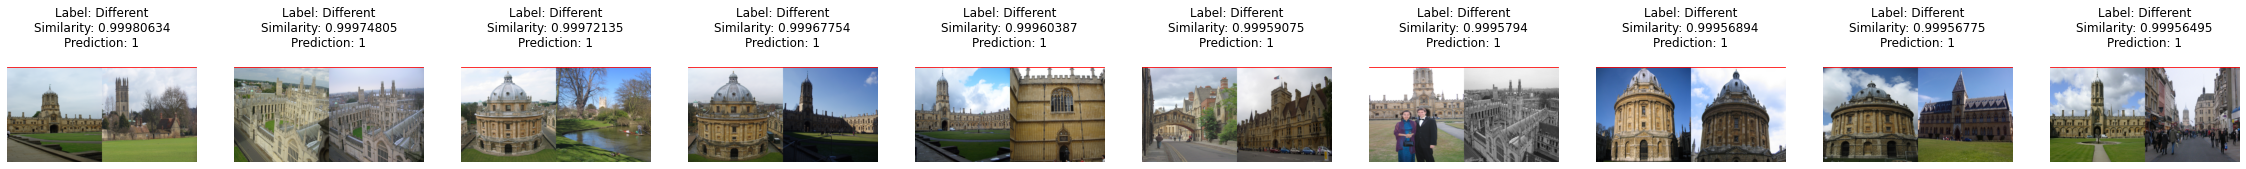

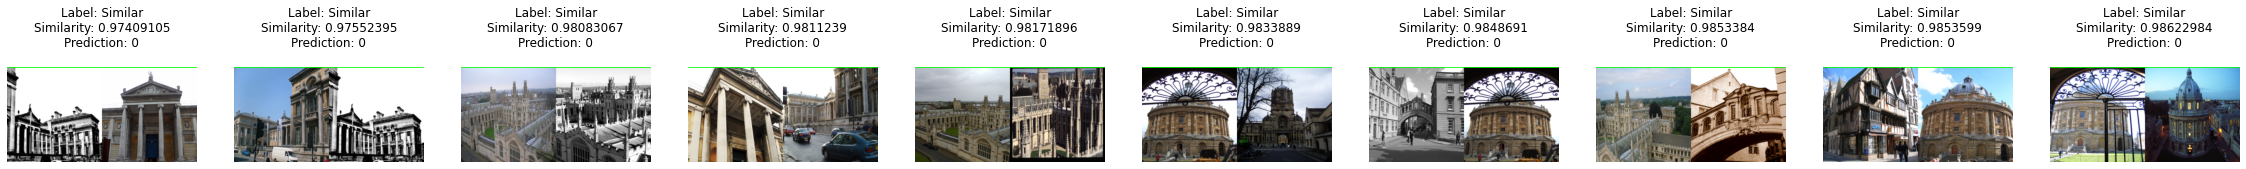

Threshold:  0.9950000000000008


In [8]:
util.evaluate(data=data, labels=labels, similarity=similarity, name="resnet")

In [5]:
resnet_embedding.save('./pretrained_resnet_embedding_extractor.h5')

In [6]:
!tensorflowjs_converter --input_format keras --weight_shard_size_bytes 1073741824 pretrained_resnet_embedding_extractor.h5 .